In [242]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Exploratory Data Analysis

In [74]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [22]:
#import data
train_df=pd.read_csv('training_set_features.csv')
labels_df=pd.read_csv('training_set_labels.csv')
test_df=pd.read_csv('test_set_features.csv')

# EDA

In [23]:
train_copy = train_df.copy()
train_copy_df = train_copy.merge(labels_df, on='id')

In [24]:
train_copy_df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [25]:
test_copy = test_df.copy()
test_copy['status_group'] = 'unk'
test_copy['status_group'].value_counts()

unk    14850
Name: status_group, dtype: int64

In [26]:
train_test_df = train_copy_df.append(test_copy, ignore_index=True, sort=False)

In [27]:
train_test_df.head

<bound method NDFrame.head of           id  amount_tsh  ... waterpoint_type_group    status_group
0      69572      6000.0  ...    communal standpipe      functional
1       8776         0.0  ...    communal standpipe      functional
2      34310        25.0  ...    communal standpipe      functional
3      67743         0.0  ...    communal standpipe  non functional
4      19728         0.0  ...    communal standpipe      functional
...      ...         ...  ...                   ...             ...
74245  39307         0.0  ...    communal standpipe             unk
74246  18990      1000.0  ...             hand pump             unk
74247  28749         0.0  ...    communal standpipe             unk
74248  33492         0.0  ...    communal standpipe             unk
74249  68707         0.0  ...    communal standpipe             unk

[74250 rows x 41 columns]>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


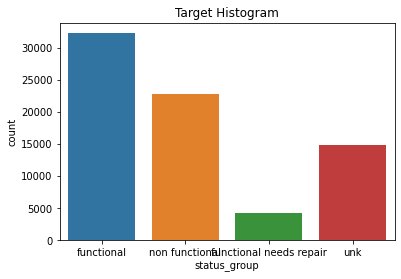

In [28]:
fig = sns.countplot(train_test_df['status_group'])
plt.title('Target Histogram')
plt.show(fig)

In [29]:
train_test_df['wpt_name'].value_counts()

none                   4440
Shuleni                2183
Zahanati               1034
Msikitini               647
Kanisani                390
                       ... 
Kwa Malunga               1
Kwa Scauti Mkandala       1
Kwa Daudi Wange           1
Ruhende                   1
Kisina                    1
Name: wpt_name, Length: 45684, dtype: int64

In [30]:
# fig = sns.distplot(train_test_df['amount_tsh'])
# plt.title('Amount of water')
# plt.show(fig)

In [31]:
train_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [32]:
train_df.head

<bound method NDFrame.head of           id  amount_tsh  ...              waterpoint_type waterpoint_type_group
0      69572      6000.0  ...           communal standpipe    communal standpipe
1       8776         0.0  ...           communal standpipe    communal standpipe
2      34310        25.0  ...  communal standpipe multiple    communal standpipe
3      67743         0.0  ...  communal standpipe multiple    communal standpipe
4      19728         0.0  ...           communal standpipe    communal standpipe
...      ...         ...  ...                          ...                   ...
59395  60739        10.0  ...           communal standpipe    communal standpipe
59396  27263      4700.0  ...           communal standpipe    communal standpipe
59397  37057         0.0  ...                    hand pump             hand pump
59398  31282         0.0  ...                    hand pump             hand pump
59399  26348         0.0  ...                    hand pump             hand pum

In [33]:
test_df.describe()


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [34]:
train_df.info

<bound method DataFrame.info of           id  amount_tsh  ...              waterpoint_type waterpoint_type_group
0      69572      6000.0  ...           communal standpipe    communal standpipe
1       8776         0.0  ...           communal standpipe    communal standpipe
2      34310        25.0  ...  communal standpipe multiple    communal standpipe
3      67743         0.0  ...  communal standpipe multiple    communal standpipe
4      19728         0.0  ...           communal standpipe    communal standpipe
...      ...         ...  ...                          ...                   ...
59395  60739        10.0  ...           communal standpipe    communal standpipe
59396  27263      4700.0  ...           communal standpipe    communal standpipe
59397  37057         0.0  ...                    hand pump             hand pump
59398  31282         0.0  ...                    hand pump             hand pump
59399  26348         0.0  ...                    hand pump             hand p

In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [36]:
train_df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [37]:
test_df.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [38]:
frame=[train_df,test_df]
data=pd.concat(frame)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   date_recorded          74250 non-null  object 
 3   funder                 69746 non-null  object 
 4   gps_height             74250 non-null  int64  
 5   installer              69718 non-null  object 
 6   longitude              74250 non-null  float64
 7   latitude               74250 non-null  float64
 8   wpt_name               74250 non-null  object 
 9   num_private            74250 non-null  int64  
 10  basin                  74250 non-null  object 
 11  subvillage             73780 non-null  object 
 12  region                 74250 non-null  object 
 13  region_code            74250 non-null  int64  
 14  district_code          74250 non-null  int64  
 15  lg

In [40]:
# data['wpt_name1'] = 1

# data.loc[(data['wpt_name'] == 'none'), 'wpt_name1'] = 0
# data.loc[:, 'wpt_name1'].value_counts()

In [41]:
# data.drop('wpt_name',axis=1,inplace=True)

In [42]:
data.nunique()

id                       74250
amount_tsh                 102
date_recorded              369
funder                    2140
gps_height                2456
installer                 2410
longitude                71870
latitude                 71869
wpt_name                 45684
num_private                 68
basin                        9
subvillage               21425
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2098
population                1128
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2868
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

In [43]:
cat_features=['quantity','management_group','management','extraction_type_class','extraction_type_group',
       'extraction_type','permit','scheme_name','scheme_management','public_meeting','ward',
       'lga','region','subvillage','basin','waterpoint_type_group','waterpoint_type','source_class',
       'source_type','source','quality_group','water_quality','payment_type','wpt_name','payment','installer'
       ,'funder','quantity_group']

for feat in cat_features:
  data[feat]= data[feat].astype('category').cat.codes

# Feature Engineering

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   date_recorded          74250 non-null  object 
 3   funder                 74250 non-null  int16  
 4   gps_height             74250 non-null  int64  
 5   installer              74250 non-null  int16  
 6   longitude              74250 non-null  float64
 7   latitude               74250 non-null  float64
 8   wpt_name               74250 non-null  int32  
 9   num_private            74250 non-null  int64  
 10  basin                  74250 non-null  int8   
 11  subvillage             74250 non-null  int16  
 12  region                 74250 non-null  int8   
 13  region_code            74250 non-null  int64  
 14  district_code          74250 non-null  int64  
 15  lg

In [45]:
data['date_recorded'] = pd.to_datetime(data['date_recorded'])
data['date_recorded']=data['date_recorded'].astype('int64')//1e9
data['year'] = pd.DatetimeIndex(data['date_recorded']).year
data['month'] = pd.DatetimeIndex(data['date_recorded']).month
#data.drop('date_recorded',axis=1,inplace=True)

In [46]:
data['construction_year'].value_counts()

0       25969
2010     3314
2008     3243
2009     3196
2000     2578
2007     1960
2006     1892
2011     1591
2003     1579
2004     1417
2012     1347
2002     1343
1995     1283
2005     1275
1978     1267
1999     1222
1998     1190
1985     1177
1990     1176
1996     1020
1980     1005
1984      970
1994      940
1982      926
1972      892
1997      821
1974      814
1992      807
1993      745
2001      680
1988      657
1983      594
1975      561
1986      553
1976      525
1970      493
1991      407
1989      396
1987      370
1981      291
1977      247
1979      245
1973      227
2013      209
1971      177
1960      124
1963      107
1967      106
1968       93
1969       77
1964       48
1962       36
1961       28
1965       21
1966       19
Name: construction_year, dtype: int64

In [47]:
data['operational_year'] = data['year'] - data['construction_year']
# data['operational_year'] = 0
# for i,row in data.iterrows():
#     if (data.loc[i, 'construction_year'] == 0).any():
#         data.loc[i, 'construction_year'] = data.loc[i, 'year'] - 5
#         data.loc[i, 'operational_year'] = data.loc[i, 'year'] - data.loc[i, 'construction_year']
#     else:
#         data.loc[i, 'operational_year'] = data.loc[i, 'year'] - data.loc[i, 'construction_year']

In [48]:
#data.operational_year = data.operational_year.abs()

In [49]:
data['operational_year'].value_counts()

 1970    25969
-40       3314
-38       3243
-39       3196
-30       2578
-37       1960
-36       1892
-41       1591
-33       1579
-34       1417
-42       1347
-32       1343
-25       1283
-35       1275
-8        1267
-29       1222
-28       1190
-15       1177
-20       1176
-26       1020
-10       1005
-14        970
-24        940
-12        926
-2         892
-27        821
-4         814
-22        807
-23        745
-31        680
-18        657
-13        594
-5         561
-16        553
-6         525
 0         493
-21        407
-19        396
-17        370
-11        291
-7         247
-9         245
-3         227
-43        209
-1         177
 10        124
 7         107
 3         106
 2          93
 1          77
 6          48
 8          36
 9          28
 5          21
 4          19
Name: operational_year, dtype: int64

In [50]:
data.drop(['year','month'],axis=1,inplace=True)

In [51]:
data['region_code']=np.log10(data['region_code']+1)
data['district_code']=np.log10(data['district_code']+1)
data['gps_height']=np.log10(data['gps_height']+100)
data['num_private']=np.log10(data['num_private']+1)
data['population']=np.log10(data['population']+1)
data['construction_year']=np.log10(data['construction_year']+1)
data['amount_tsh'] = np.log(data['amount_tsh']+1)

In [52]:
data['amt_pop'] = data.loc[:, 'amount_tsh']/(data.loc[:, 'population']+0.4)

In [53]:
#Dropping columns that are high correlated with other columns or they have large amount of missing values:
data.drop(['id','recorded_by','source_type','waterpoint_type_group',
            'scheme_name','extraction_type_class','quantity_group'], axis = 1, inplace = True)

In [54]:
data.index=range(0,len(data['funder']))    
train=data.loc[0:len(train_df['funder'])-1,:]
test=data.loc[len(train_df['funder']):,:]
train.index=train_df.index
test.index=test_df.index
len(test['funder'])

14850

# Model Training

In [55]:
X_train, X_cv, Y_train, y_cv= train_test_split(
        train,labels_df['status_group'], test_size=0.01, random_state=42)

In [56]:
clf_rf = RandomForestClassifier(n_estimators=600,max_depth=22,random_state=0)

In [57]:
clf_rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=22, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [58]:
print('train Accuarcy=====>',clf_rf.score(X_train, Y_train))

train Accuarcy=====> 0.9780804679794579


In [59]:
print('cross validation accuarcy=====>',clf_rf.score(X_cv, y_cv))

cross validation accuarcy=====> 0.8333333333333334


In [ ]:
print(classification_report(y_cv,clf_rf.predict(X_cv)))

In [75]:
abc = AdaBoostClassifier()
abc.fit(X_train,Y_train)
print('train Accuarcy=====>',abc.score(X_train, Y_train))
print('cross validation accuarcy=====>',abc.score(X_cv, y_cv))
print(classification_report(y_cv,abc.predict(X_cv)))

train Accuarcy=====> 0.7225963337074448
cross validation accuarcy=====> 0.7255892255892256
                         precision    recall  f1-score   support

             functional       0.69      0.91      0.78       310
functional needs repair       0.40      0.05      0.09        41
         non functional       0.81      0.61      0.69       243

               accuracy                           0.73       594
              macro avg       0.63      0.52      0.52       594
           weighted avg       0.72      0.73      0.70       594



In [63]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
print('train Accuarcy=====>',gbc.score(X_train, Y_train))
print('cross validation accuarcy=====>',gbc.score(X_cv, y_cv))


train Accuarcy=====> 0.7555691596095636
cross validation accuarcy=====> 0.7542087542087542


In [79]:
print(classification_report(y_cv,gbc.predict(X_cv)))

                         precision    recall  f1-score   support

             functional       0.71      0.94      0.81       310
functional needs repair       0.67      0.15      0.24        41
         non functional       0.85      0.62      0.72       243

               accuracy                           0.75       594
              macro avg       0.74      0.57      0.59       594
           weighted avg       0.77      0.75      0.73       594



In [66]:
from sklearn import tree 
# Decision Tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, Y_train)
print('train Accuarcy=====>',dt.score(X_train, Y_train))
print('cross validation accuarcy=====>',dt.score(X_cv, y_cv))



train Accuarcy=====> 0.9999829949324899
cross validation accuarcy=====> 0.734006734006734


In [80]:
print(classification_report(y_cv,dt.predict(X_cv)))

                         precision    recall  f1-score   support

             functional       0.77      0.78      0.77       310
functional needs repair       0.30      0.37      0.33        41
         non functional       0.79      0.74      0.76       243

               accuracy                           0.73       594
              macro avg       0.62      0.63      0.62       594
           weighted avg       0.74      0.73      0.74       594



In [81]:
from sklearn.neighbors import KNeighborsClassifier 
#KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)
print('train Accuarcy=====>',knn.score(X_train, Y_train))
print('cross validation accuarcy=====>',knn.score(X_cv, y_cv))


train Accuarcy=====> 0.6578750467639356
cross validation accuarcy=====> 0.5791245791245792


In [82]:
print(classification_report(y_cv,knn.predict(X_cv)))

                         precision    recall  f1-score   support

             functional       0.58      0.79      0.67       310
functional needs repair       0.25      0.05      0.08        41
         non functional       0.58      0.40      0.47       243

               accuracy                           0.58       594
              macro avg       0.47      0.41      0.41       594
           weighted avg       0.56      0.58      0.55       594



In [83]:
import xgboost 
from xgboost.sklearn import XGBClassifier 
# XGBoost
clf_xgb = XGBClassifier(objective='multi:softmax')
clf_xgb.fit(X_train,Y_train)
print('train Accuarcy=====>',clf_xgb.score(X_train, Y_train))
print('cross validation accuarcy=====>',clf_xgb.score(X_cv, y_cv))


train Accuarcy=====> 0.7476107880148284
cross validation accuarcy=====> 0.7491582491582491


In [84]:
print(classification_report(y_cv,clf_xgb.predict(X_cv)))

                         precision    recall  f1-score   support

             functional       0.71      0.94      0.81       310
functional needs repair       0.83      0.12      0.21        41
         non functional       0.85      0.61      0.71       243

               accuracy                           0.75       594
              macro avg       0.80      0.56      0.58       594
           weighted avg       0.77      0.75      0.73       594



In [85]:
from sklearn.svm import LinearSVC 
# SVM
clf_svm = LinearSVC(random_state=0)
clf_svm.fit(X_train,Y_train)
print('train Accuarcy=====>',clf_svm.score(X_train, Y_train))
print('cross validation accuarcy=====>',clf_svm.score(X_cv, y_cv))


train Accuarcy=====> 0.3839914294459749
cross validation accuarcy=====> 0.4090909090909091


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [86]:
print(classification_report(y_cv,clf_svm.predict(X_cv)))

                         precision    recall  f1-score   support

             functional       0.00      0.00      0.00       310
functional needs repair       0.00      0.00      0.00        41
         non functional       0.41      1.00      0.58       243

               accuracy                           0.41       594
              macro avg       0.14      0.33      0.19       594
           weighted avg       0.17      0.41      0.24       594



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
from sklearn.linear_model import SGDClassifier
# Logistic Regression
clf_lr = SGDClassifier(loss='log',random_state=0)
clf_lr.fit(X_train,Y_train)
print('train Accuarcy=====>',clf_lr.score(X_train, Y_train))
print('cross validation accuarcy=====>',clf_lr.score(X_cv, y_cv))


train Accuarcy=====> 0.5432949018807605
cross validation accuarcy=====> 0.5218855218855218


In [88]:
print(classification_report(y_cv,clf_lr.predict(X_cv)))

                         precision    recall  f1-score   support

             functional       0.52      1.00      0.69       310
functional needs repair       0.00      0.00      0.00        41
         non functional       0.00      0.00      0.00       243

               accuracy                           0.52       594
              macro avg       0.17      0.33      0.23       594
           weighted avg       0.27      0.52      0.36       594



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
y_sub = test_df[['id']]
y_preds = y_sub[['id']]
y_preds['status_group'] = clf_rf.predict(test)

In [76]:
y_preds.to_csv('submission_rf.csv', index=False)